In [1]:
import sys
sys.path.append('..')
from src.pomdp import *

## Model definition 

In [2]:
model, solver = load_POMDP_file(file_name='./Example Models/4x4.95-no_loop.POMDP')

[10/14/2023, 00:50:24] Instantiation of MDP Model:
[10/14/2023, 00:50:24] - 16 states
[10/14/2023, 00:50:24] - 4 actions
[10/14/2023, 00:50:24] - Starting generation of transitions table
[10/14/2023, 00:50:24]     > Done in 0.000s
[10/14/2023, 00:50:24] - Generation of state grid
[10/14/2023, 00:50:24] - Generating start probabilities table
[10/14/2023, 00:50:24] - Starting computation of reachable states from transition data
[10/14/2023, 00:50:24]     > Done in 0.001s
[10/14/2023, 00:50:24] - At most 1 reachable states per state-action pair
[10/14/2023, 00:50:24] - Starting computation of reachable state probabilities from transition data
[10/14/2023, 00:50:24]     > Done in 0.000s
[10/14/2023, 00:50:24] POMDP particular parameters:
[10/14/2023, 00:50:24] - 2 observations
[10/14/2023, 00:50:24] - Starting of transitional observations for reachable states table
[10/14/2023, 00:50:24]     > Done in 0.000s
[10/14/2023, 00:50:24] - Starting generation of expected rewards table
[10/14/2023

In [3]:
model.state_grid = model.state_grid.reshape((4,4))

In [4]:
model.end_states = [15]

## Solving

In [5]:
solver.eps = 10e-4

In [6]:
vf, history = solver.solve(model, 10,10)

Expansions:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 0:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 1:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 2:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 3:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 4:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 5:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 6:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 7:   0%|          | 0/10 [00:00<?, ?it/s]

Backups 8:   0%|          | 0/10 [00:00<?, ?it/s]

Converged!


[Warning] 'as_grid' parameter set to False but state count is >3 so it will be plotted as a grid


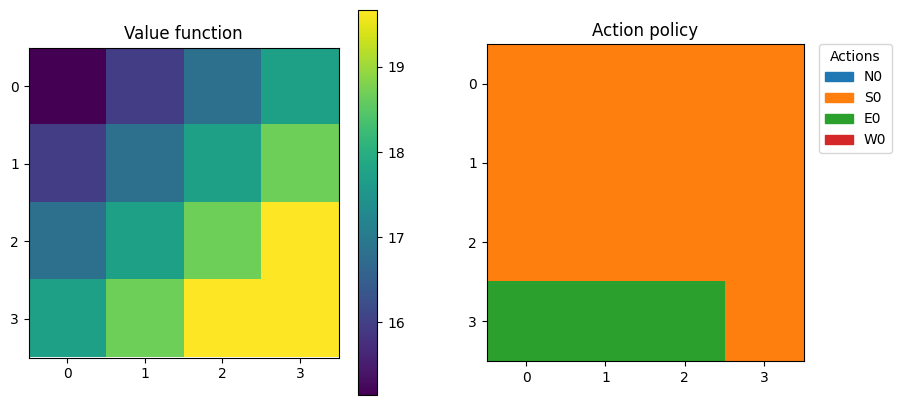

In [7]:
vf.plot()

## Simulation

In [8]:
a = Agent(model)
a.value_function = vf

In [9]:
sim_history = a.simulate(start_state=0)

  0%|          | 0/1000 [00:00<?, ?it/s]

Simulation done:
	- Runtime (s): 0.018128
	- Steps: 7
	- Total rewards: 1.0
	- End state: s15


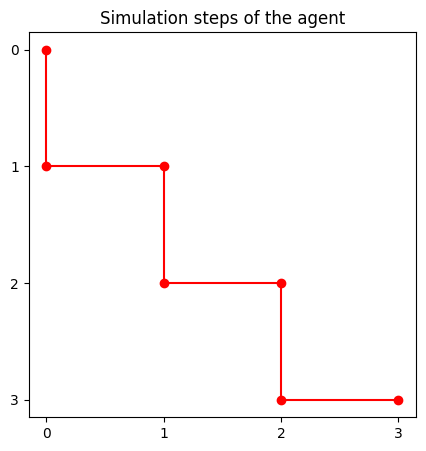

In [10]:
sim_history.plot_simulation_steps()

In [11]:
sim_history.save_simulation_video()

Video saved at 'Sim Videos/s16-a4-20231014_005026.mp4'...


: 